In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
# 한글이 깨지지 않도록 설정하기
plt.rc('font', family='Malgun Gothic')
# - 기호 깨지지 않도록 설정하기
plt.rc('axes', unicode_minus=False)

import FinanceDataReader as fdr


<Axes: title={'center': '한글폰트테스트'}>

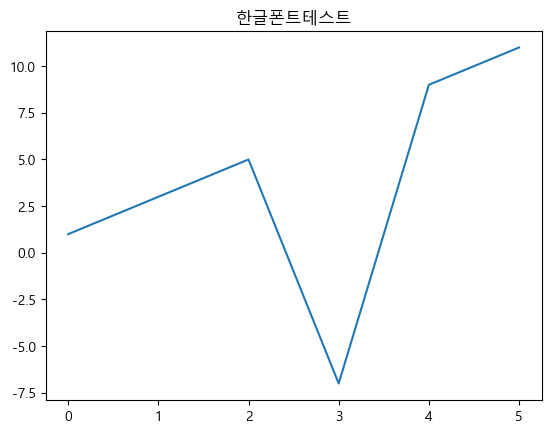

In [2]:
pd.Series([1, 3, 5, -7, 9, 11]).plot(title='한글폰트테스트')

In [3]:
krx_df = pd.read_csv('https://raw.githubusercontent.com/corazzon/finance-data-analysis/main/krx.csv')
krx_df.shape

(2612, 10)

In [4]:
krx_df[:3]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시


In [5]:
krx_df['Market'].unique()

array(['KOSDAQ', 'KOSPI', 'KONEX'], dtype=object)

In [6]:
krx_df['Market'].value_counts()

KOSDAQ    1471
KOSPI      998
KONEX      143
Name: Market, dtype: int64

<Axes: >

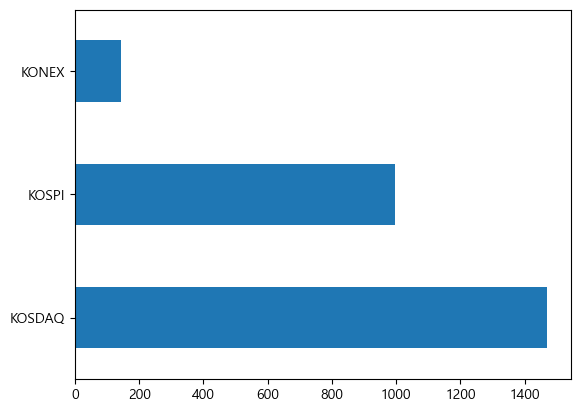

In [7]:
krx_df['Market'].value_counts().plot.barh()

<Axes: >

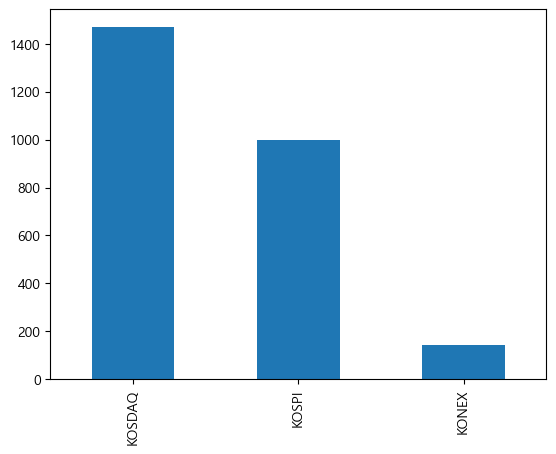

In [8]:
krx_df['Market'].value_counts().plot.bar()

<Axes: xlabel='count', ylabel='Market'>

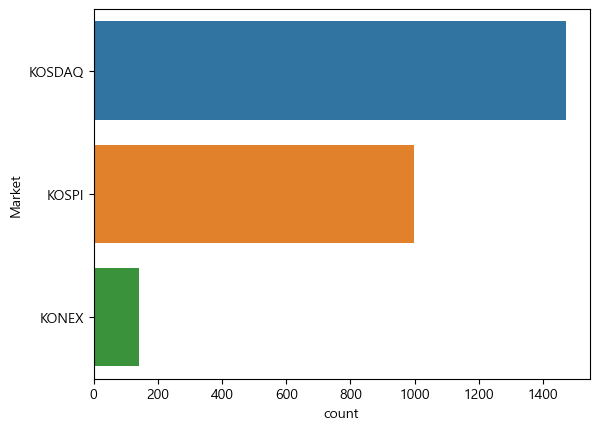

In [9]:
'''
seaborn 의 countplot() 함수
'''
sns.countplot(data=krx_df, y='Market')

In [11]:
'''
Sector 컬럼의 빈도수 구하기

'''
sector_top20 = krx_df['Sector'].value_counts().head(20)
sector_top20

특수 목적용 기계 제조업                        141
소프트웨어 개발 및 공급업                       135
전자부품 제조업                             121
자동차 신품 부품 제조업                         97
의약품 제조업                               93
기타 금융업                                92
기타 화학제품 제조업                           90
통신 및 방송 장비 제조업                        72
금융 지원 서비스업                            71
1차 철강 제조업                             57
반도체 제조업                               57
자연과학 및 공학 연구개발업                       53
의료용 기기 제조업                            50
일반 목적용 기계 제조업                         44
플라스틱제품 제조업                            43
기초 화학물질 제조업                           43
기타 전문 도매업                             42
기초 의약물질 및 생물학적 제제 제조업                 38
컴퓨터 프로그래밍, 시스템 통합 및 관리업               35
전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업     34
Name: Sector, dtype: int64

<Axes: title={'center': 'Sector 컬럼 빈도수'}>

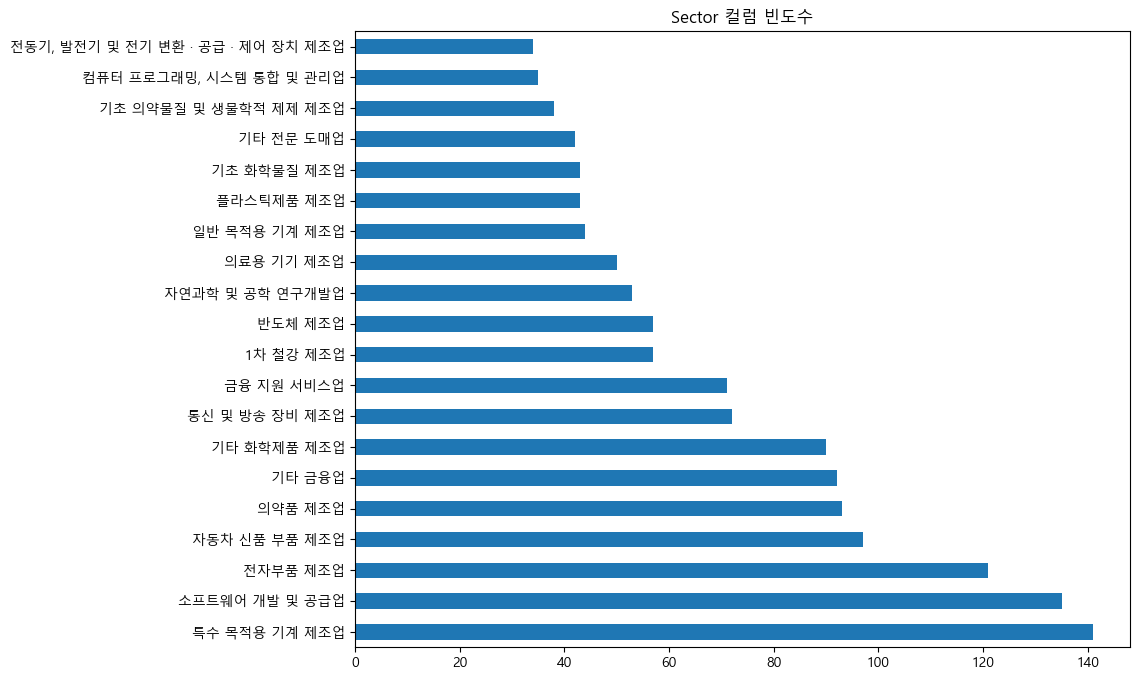

In [12]:
# 오름차순
sector_top20.plot.barh(figsize=(10, 8), title='Sector 컬럼 빈도수')

In [ ]:
# 내림차순
sector_top20.sort_values().plot.barh(figsize=(10, 8), title='Sector 컬럼 빈도수')

In [ ]:
# 내림차순
sns.countplot(data=krx_df[krx_df['Sector'].isin(sector_top20.index)],
              y='Sector', palette='Blues_r',
              order=sector_top20.index)

In [ ]:
# 빈도수가 가장 많은 data  
krx_df[krx_df['Sector']=='특수 목적용 기계 제조업']

In [ ]:
# Industry 컬럼의 빈도수 구하기
industry_top20 = krx_df['Industry'].value_counts().head(20)
industry_top20.index
industry_top20

In [ ]:
# 오름차순
industry_top20.plot.barh()

In [ ]:
# 내림차순
industry_top20.sort_values().plot.barh()

In [ ]:
'''
지역별로 상장사들의 빈도수 알아보기
Region   Name
'''
region_top20 = krx_df['Region'].value_counts().head(20)

# 오름차순
region_top20.plot.barh()

# 내림차순
region_top20.sort_values().plot.barh()

In [ ]:
krx_df.columns

In [ ]:
'''
seaborn 의 countplot() 사용하기
'''
sns.countplot(data=krx_df, y='Region', palette='Blues_r').set_title('소재지별 종목 수')

In [ ]:
sns.countplot(data=krx_df, y='Region', palette='Blues_r',
              order=krx_df['Region'].value_counts().index).set_title('소재지별 종목 수')

In [ ]:
'''
Region 컬럼(의 값을) 기준으로 오름차순 정렬하기
'''
sns.countplot(data=krx_df.sort_values('Region'),
              palette='Blues_r', y='Region')

In [ ]:
'''
두 개의 변수 빈도수 구하기 (시각화)

pd.corsstab() 함수 사용
'''
# Market 과 Region 컬럼의 빈도수 구하기
pd.crosstab(krx_df['Market'], krx_df['Region'])

In [ ]:
# Market 과 Region 컬럼의 빈도수 시각화하기
sns.countplot(data=krx_df, y='Region', hue='Market')

In [ ]:
krx_df['ListingDate'] = pd.to_datetime(krx_df['ListingDate'])
krx_df['ListingYear'] = krx_df['ListingDate'].dt.year
krx_df['ListingYear'][:3]

In [ ]:
'''
년도별 마켓별 상장종목 빈도수 구하기
'''
market_year_df = pd.crosstab(krx_df['Market'], krx_df['ListingYear'])
market_year_df

In [ ]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=90)
sns.countplot(data=krx_df, x='ListingYear', hue='Market')

In [66]:
market_year_df

ListingYear,1956.0,1962.0,1964.0,1966.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,...,0,0,13,13,27,28,19,14,17,12
KOSDAQ,0,0,0,0,0,0,0,0,0,0,...,53,20,35,59,90,65,68,90,97,86
KOSPI,5,1,1,1,6,5,4,1,3,22,...,25,14,11,9,18,18,20,19,15,14


<Axes: xlabel='Market'>

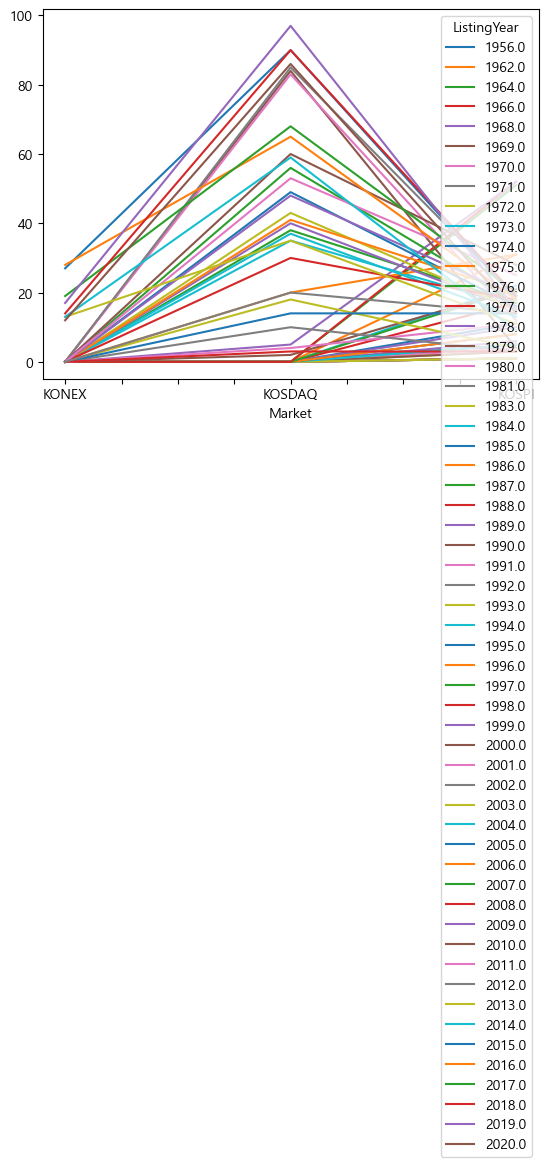

In [65]:
'''
DataFrame 의 T(Transpose) 속성 : 행과 열을 바꿈
'''
market_year_df.plot()

<Axes: xlabel='ListingYear'>

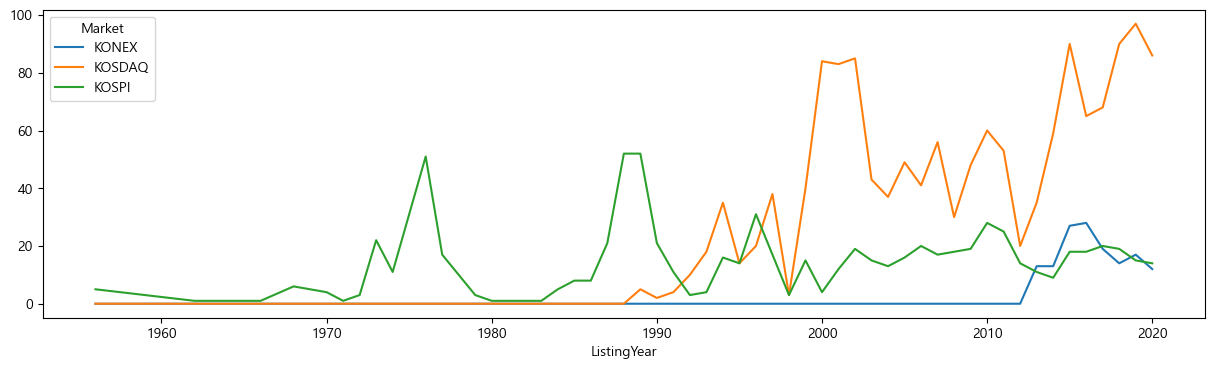

In [64]:
market_year_df.T.plot(figsize=(15, 4))